In [1]:
# https://leandeep.com/datalab-kaggle/comprehensive-data-exploration-with-python.html

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath = r'../input/CPT_PremstallerGeotechnik_revised.csv'
df = pd.read_csv(filepath)
print(df.head())

/tmp/ipykernel_6124/2399715451.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


   ID test_type basin_valley  Depth (m)  qc (MPa)  fs (kPa)  u2 (kPa)  \
0   0       CPT   Zell basin       0.02      1.15       1.0       NaN   
1   0       CPT   Zell basin       0.04      2.85       1.0       NaN   
2   0       CPT   Zell basin       0.06      4.80       1.0       NaN   
3   0       CPT   Zell basin       0.08      6.40       6.0       NaN   
4   0       CPT   Zell basin       0.10      6.90       6.0       NaN   

   Vs (m/s)  qt (MPa)  Rf (%)  ...  U2 (-)  SBT (-)  SBTn (-)  Mod. SBTn (-)  \
0       NaN      1.77    0.06  ...     NaN      0.0       0.0            0.0   
1       NaN      2.99    0.03  ...     NaN      0.0       0.0            0.0   
2       NaN      4.76    0.06  ...     NaN      0.0       0.0            0.0   
3       NaN      6.12    0.07  ...     NaN      0.0       0.0            0.0   
4       NaN      6.91    0.10  ...     NaN      0.0       0.0            0.0   

      n  Ic (-)  Ic SBT (-)  Ib (-)  EN_ISO_14688_classes  \
0 -0.12    2.56    

In [4]:
df.columns

Index(['ID', 'test_type', 'basin_valley', 'Depth (m)', 'qc (MPa)', 'fs (kPa)',
       'u2 (kPa)', 'Vs (m/s)', 'qt (MPa)', 'Rf (%)', 'γ (kN/m³)', 'σ,v (kPa)',
       'u0 (kPa)', 'σ',v (kPa)', 'Qt (-)', 'Qtn (-)', 'Fr (%)', 'Bq (-)',
       'U2 (-)', 'SBT (-)', 'SBTn (-)', 'Mod. SBTn (-)', 'n', 'Ic (-)',
       'Ic SBT (-)', 'Ib (-)', 'EN_ISO_14688_classes',
       'Oberhollenzer_classes'],
      dtype='object')

In [5]:
print('Number of Oberhollenzer_classes classified rows = {}'.format(len(df[~pd.isna(df.Oberhollenzer_classes)])))
len(df[~pd.isna(df.Oberhollenzer_classes)])

Number of Oberhollenzer_classes classified rows = 880960


880960

In [6]:
df = df[~pd.isna(df.Oberhollenzer_classes)]
df[['Oberhollenzer_classes']].describe()

,Oberhollenzer_classes
count,880960.000000
mean,4.399736
std,2.286341
min,0.000000
25%,2.000000
50%,5.000000
75%,6.000000
max,7.000000


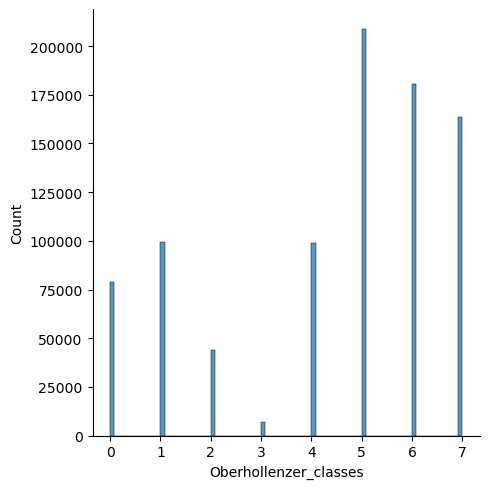

In [7]:
sns.displot(df['Oberhollenzer_classes'])
plt.show()

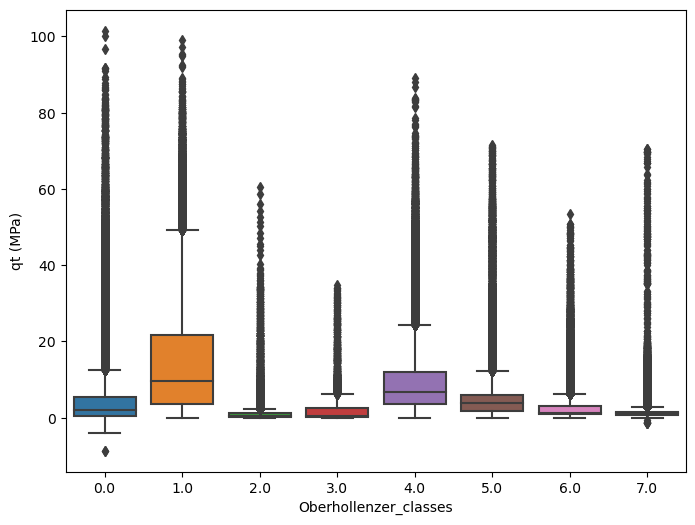

In [8]:
# distributions of qt for each class
var = 'qt (MPa)'
data = pd.concat([df['Oberhollenzer_classes'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Oberhollenzer_classes', y=var, data=data, ax=ax)
#fig.axis(ymin=0, ymax=800000)
plt.show()

['Depth (m)', 'qc (MPa)', 'fs (kPa)', 'Rf (%)', 'u0 (kPa)', 'σ,v (kPa)', "σ',v (kPa)", 'Oberhollenzer_classes']


<Figure size 640x480 with 0 Axes>

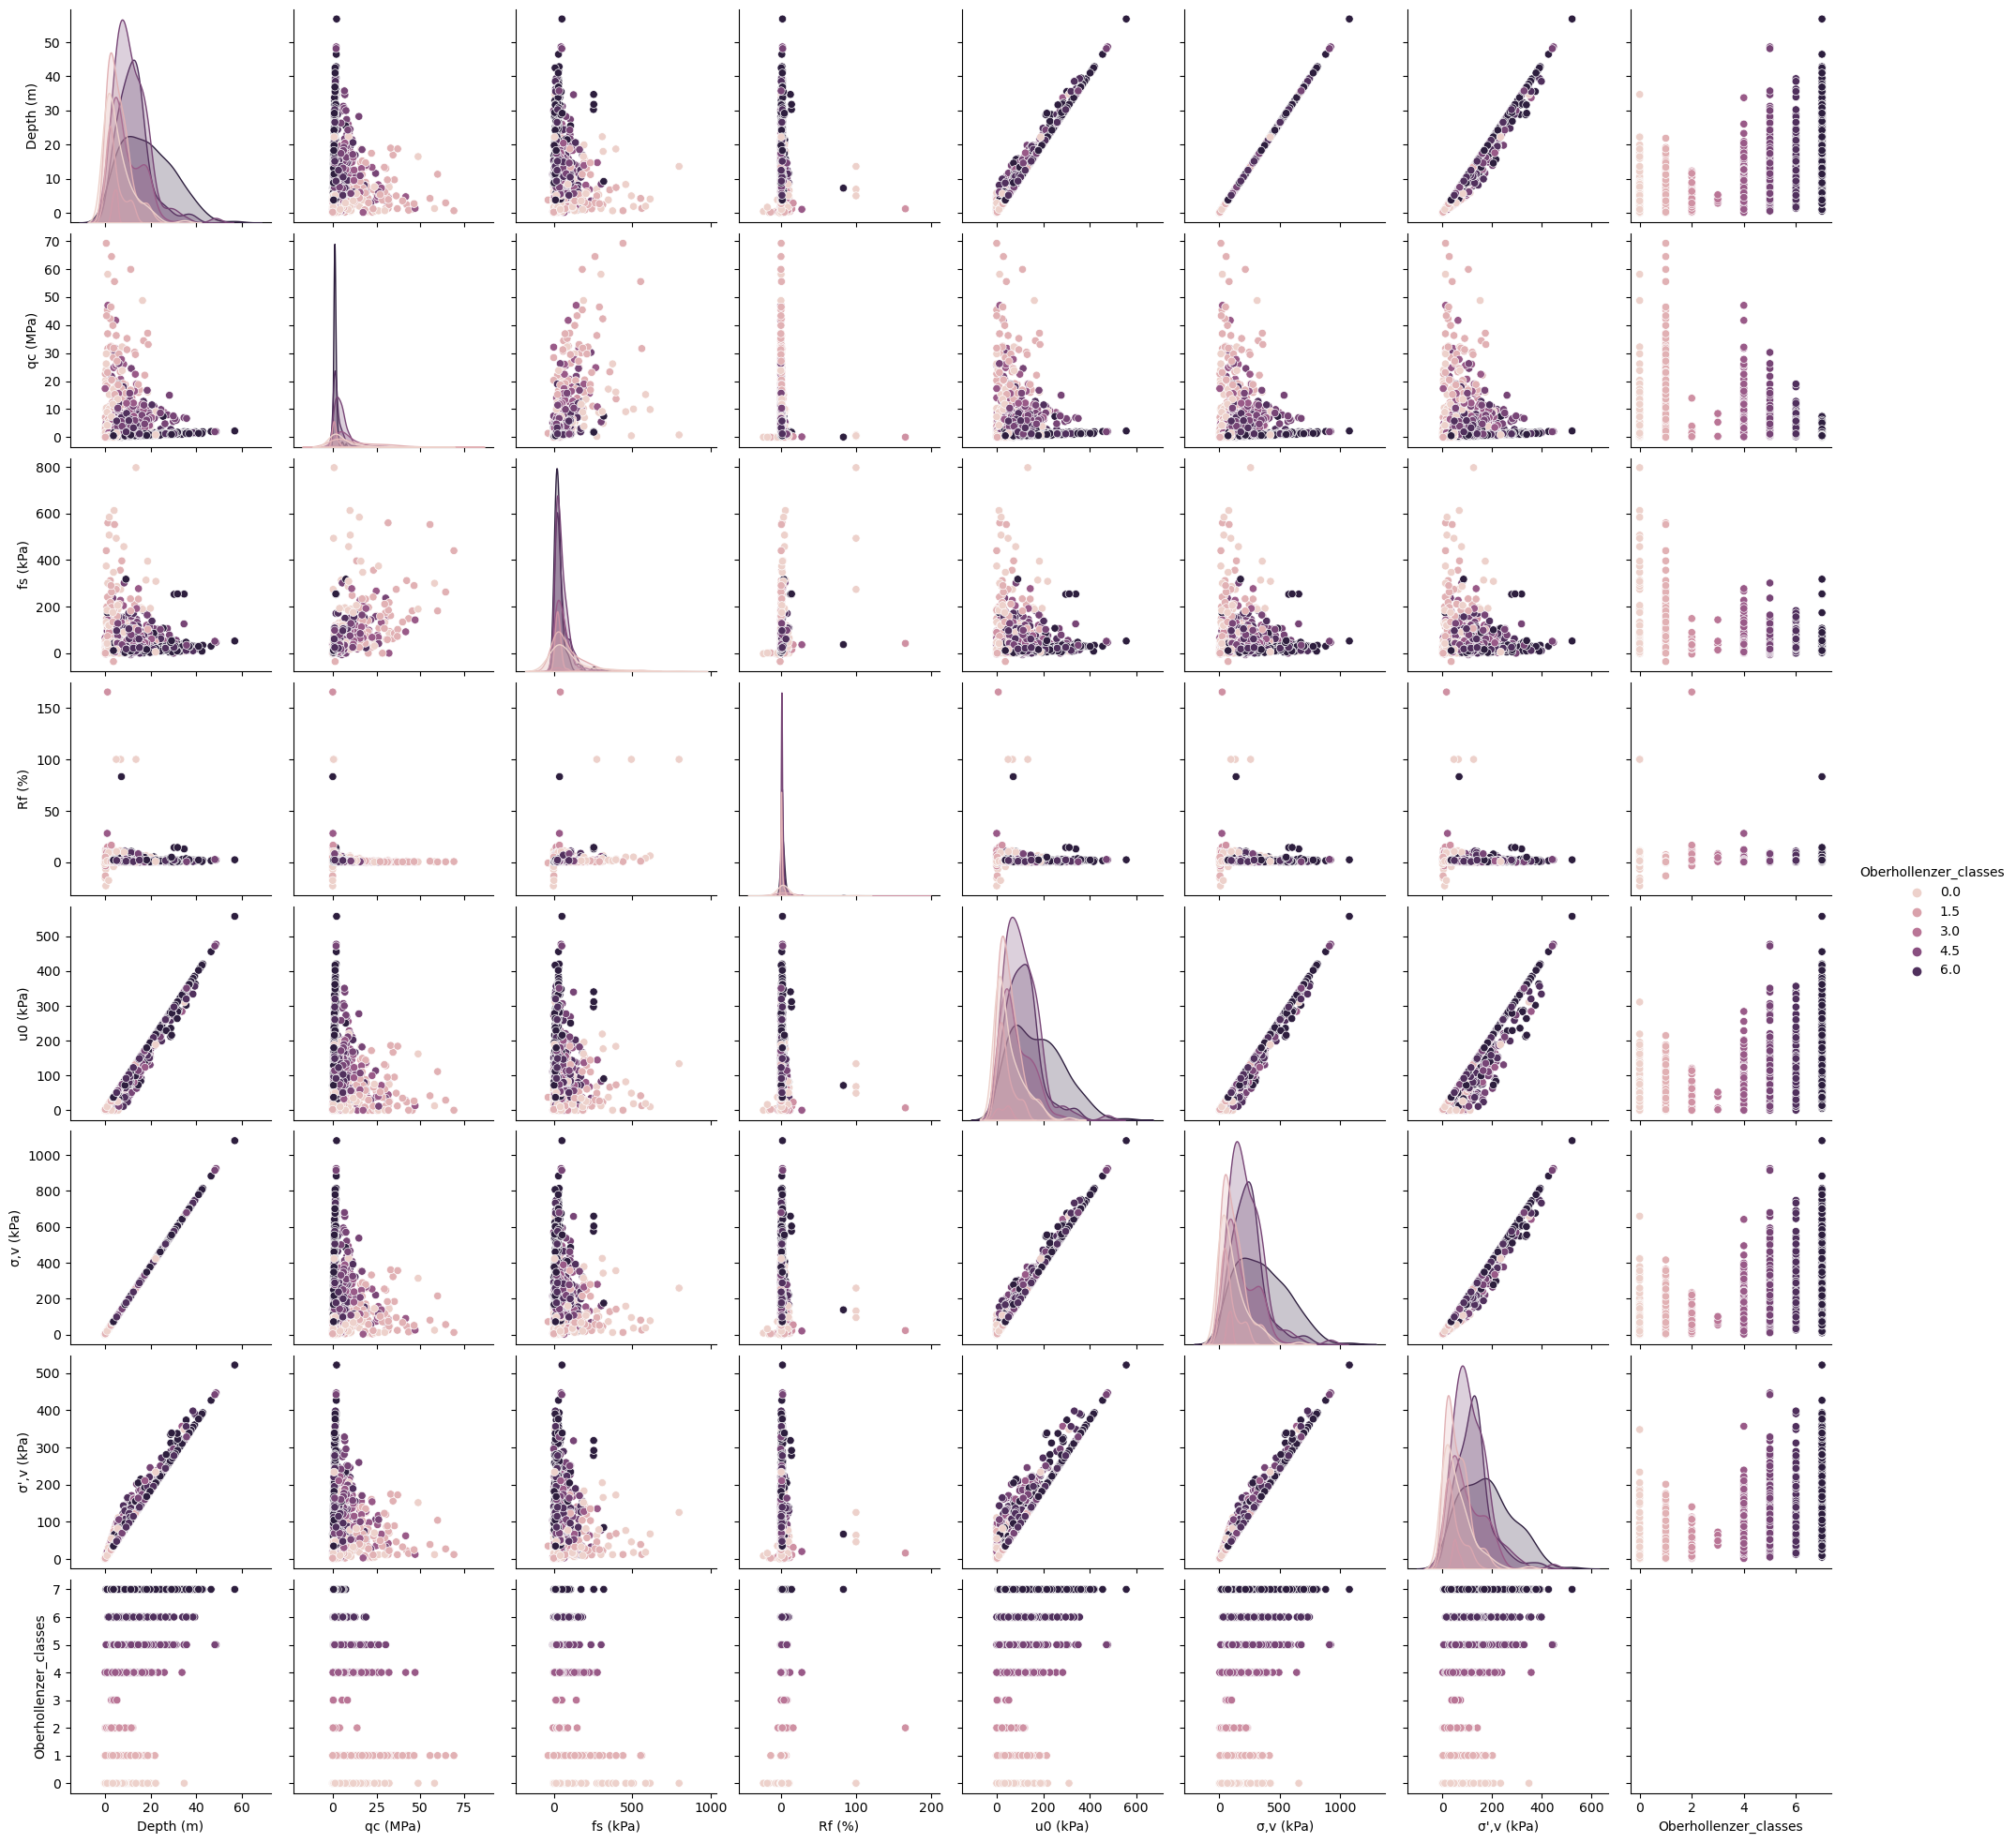

In [9]:
columns_to_plot = ['Depth (m)', 'qc (MPa)', 'fs (kPa)', 'Rf (%)', 'u0 (kPa)', 'σ,v (kPa)', "σ',v (kPa)", 'Oberhollenzer_classes']

print(columns_to_plot)

plt.figure()
# make pairplot for a limited number of samples
sns.pairplot(df.sample(1000),  hue='Oberhollenzer_classes', vars=columns_to_plot, diag_kind='kde')
plt.show()

/tmp/ipykernel_6124/3616361879.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


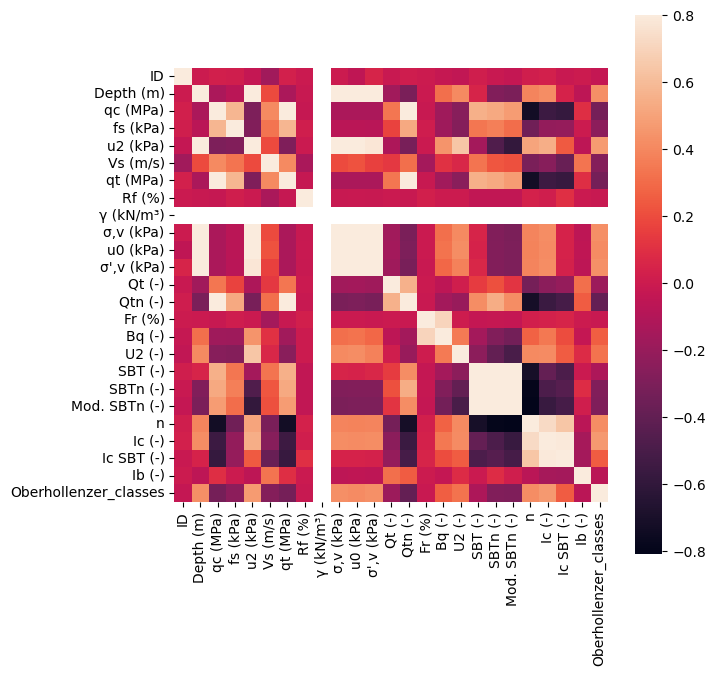

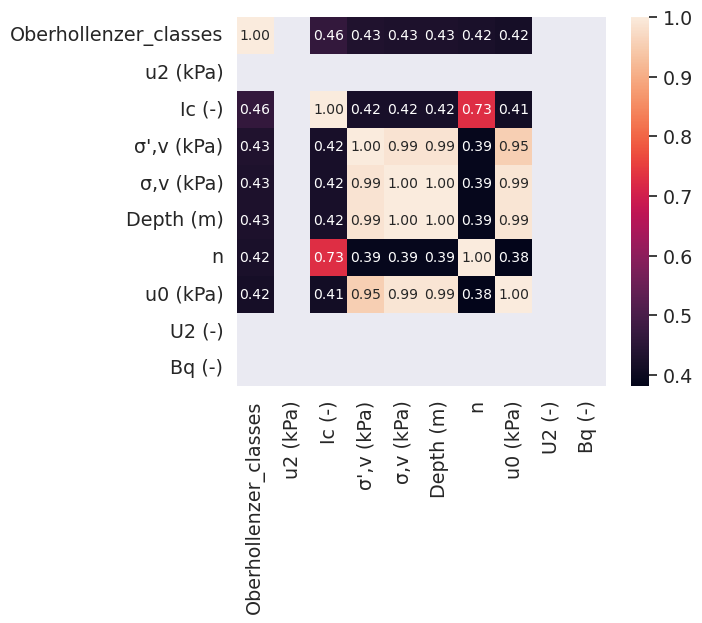

In [10]:
#calculate and plot correlation matrix
corrmat = df.corr()

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.savefig('heatmap.png', dpi=300)
plt.show()

#Oberhollenzer_classes correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Oberhollenzer_classes')['Oberhollenzer_classes'].index
cm = np.corrcoef(df[
    cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

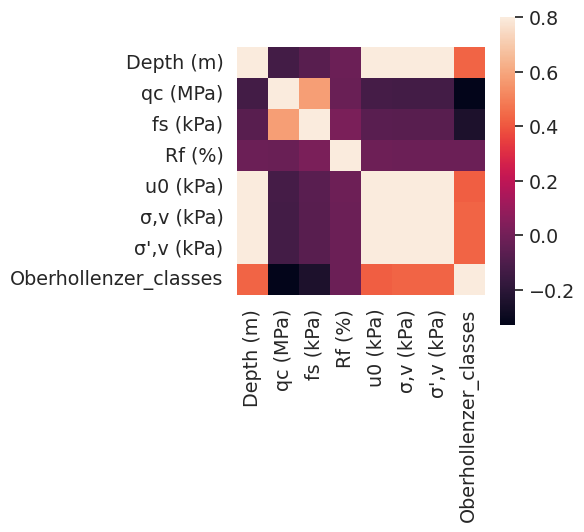

In [11]:
corrmat = df[columns_to_plot].corr()

f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [12]:
# Calculate the amount of missing data
df = df[columns_to_plot]
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing datapoints', 'Missing data [%]'])
missing_data.head(20)

# In the paper, they just drop all that have NaN rows
df = df.dropna()


/tmp/ipykernel_6124/2218381417.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], fit=norm)


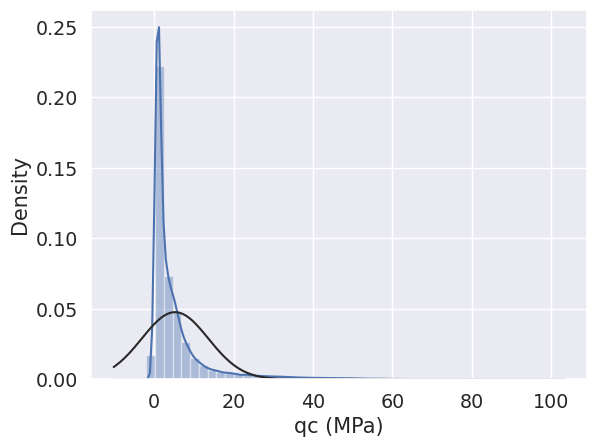

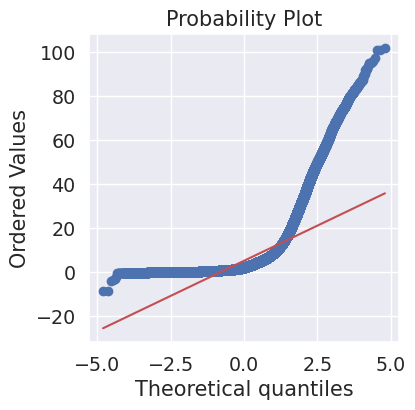

In [13]:
#histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
column = 'qc (MPa)'
sns.distplot(df[column], fit=norm)
fig = plt.figure(figsize=(4,4))
res = stats.probplot(df[column], plot=plt)
plt.show()

In [14]:
#applying log transformation
df[column+'_log'] = np.log(df[column])
#transformed histogram and normal probability plot

#sns.distplot(df[column+'_log'], fit=norm)

fig = plt.figure()


# plt.plot(df[res = stats.probplot(df[column+'_log'], plot=plt)
plt.show()

/home/lug/miniconda3/envs/mlenv/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/lug/miniconda3/envs/mlenv/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

TSNE

In [15]:
cols = ['Depth (m)', 'qc (MPa)', 'fs (kPa)', 'Rf (%)', 'u0 (kPa)', 'σ,v (kPa)', "σ',v (kPa)", 'Oberhollenzer_classes']
X = df[cols].drop('Oberhollenzer_classes', axis=1)
y = df['Oberhollenzer_classes']
X

,Depth (m),qc (MPa),fs (kPa),Rf (%),u0 (kPa),"σ,v (kPa)","σ',v (kPa)"
1486510,0.01,0.00,0.0,0.0,0.10,0.19,0.09
1486511,0.02,0.00,0.0,0.0,0.20,0.38,0.18
1486512,0.03,0.00,0.0,0.0,0.29,0.57,0.28
1486513,0.04,0.00,0.0,0.0,0.39,0.76,0.37
1486514,0.05,0.00,0.0,0.0,0.49,0.95,0.46
...,...,...,...,...,...,...,...
2516974,9.82,49.59,0.0,0.0,71.81,186.58,114.77
2516975,9.83,50.51,0.0,0.0,71.91,186.77,114.86
2516976,9.84,54.25,0.0,0.0,72.01,186.96,114.95
2516977,9.85,54.91,0.0,0.0,72.10,187.15,115.05


/home/lug/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lug/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_6124/446936889.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.column_stack((transformed_data, y[:3000])),
/tmp/ipykernel_6124/446936889.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use e

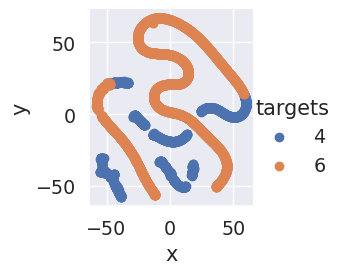

In [16]:
# perform T-SNE
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(X[:3000])

# make dataframe with T-SNE results and targets
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, y[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

# plot the T-SNE groupds with color
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()

In [20]:
# preparing and saving data
columns = ['Depth (m)', 'qc (MPa)', 'fs (kPa)', 'Rf (%)', 'u0 (kPa)', 'σ,v (kPa)', "σ',v (kPa)", 'Oberhollenzer_classes']
data = df[columns].dropna()
data = data.rename(columns={'Oberhollenzer_classes':'label'})
data.to_csv("../input/train.csv")
data.head()